In [1]:
## import pkgs
import re
import json
import numpy as np
from copy import deepcopy
from sklearn import linear_model
from collections import OrderedDict
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
## prepare data
data_raw = np.random.randint(1, 5, (10, 2))
data_raw = data_raw + np.random.random(data_raw.shape)


In [3]:
data_raw


array([[4.29852059, 1.98035591],
       [3.36152908, 3.84760253],
       [4.99367423, 1.85902844],
       [3.45574295, 2.13740451],
       [2.91458402, 3.54985557],
       [2.62961129, 4.1678134 ],
       [4.37045834, 4.99965457],
       [4.62080498, 2.94751671],
       [3.17671191, 2.09570089],
       [2.61811653, 4.60088754]])

In [4]:
data = deepcopy(data_raw)
for i in range(1, len(data)):
    data[i, 0] = np.sum(data[i, 0] + data[i - 1, 0])


In [5]:
data[:, 0]


array([ 4.29852059,  7.66004967, 12.6537239 , 16.10946686, 19.02405087,
       21.65366216, 26.0241205 , 30.64492548, 33.82163739, 36.43975392])

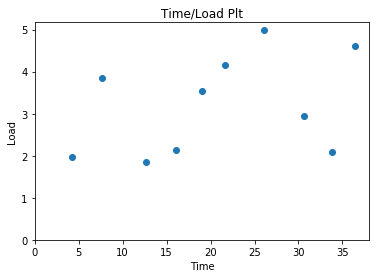

In [6]:
plt.scatter(data[:, 0], data[:, 1])
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Time/Load Plt')
plt.show()


In [7]:
## fit data
clf = linear_model.LinearRegression()
clf.fit(data[:, 0].reshape(-1, 1), data[:, 1])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
## coef
print(clf.coef_)

## bias
print(clf.intercept_)


[0.03920611]
2.4018014777102206


In [9]:
## calculate the line
x_lr = [0, data[-1, 0]]
y_lr = [ clf.coef_ * x + clf.intercept_ for x in x_lr ]


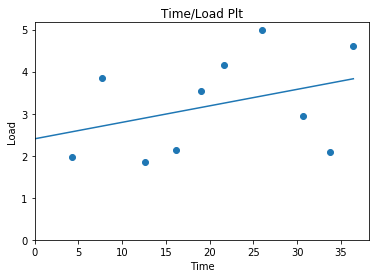

In [10]:
## plot
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(data[:, 0], data[:, 1])
ax1.plot(x_lr, y_lr)
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Time/Load Plt')
plt.show()


In [11]:
## generate command
result = ''
for x, y in zip(data_raw[:, 0], data_raw[:, 1]):
    tmp = '"{}": {},'.format(x, y)
    if result == '':
        result = tmp
        
    result += tmp
    
result = re.sub(',$', '', result)
result = json.loads(json.dumps(result), object_pairs_hook=OrderedDict)
print('curl http://localhost:5000/20180920v1 -d \'data={{{}}}\' -X PUT'.format(result))


curl http://localhost:5000/20180920v1 -d 'data={"4.298520591691375": 1.9803559077022665,"4.298520591691375": 1.9803559077022665,"3.361529079642756": 3.8476025333628474,"4.993674231875169": 1.859028442659599,"3.455742952127464": 2.137404514642943,"2.914584016095107": 3.5498555651557187,"2.6296112886342975": 4.167813404801102,"4.370458342945869": 4.999654573042138,"4.620804980924634": 2.9475167113877125,"3.176711908165042": 2.0957008882054597,"2.6181165289770325": 4.600887542960237}' -X PUT


In [12]:
## timestamp
import time
import datetime
date_raw = '2018-09-23-19.00.00'
date = time.strptime(date_raw,"%Y-%m-%d-%H.%M.%S")
date = datetime.datetime(date[0], date[1], date[2], date[3], date[4], date[5])


In [13]:
date += datetime.timedelta(minutes = 10)
date


datetime.datetime(2018, 9, 23, 19, 10)

In [14]:
## generate time feature
data_time = deepcopy(data_raw)
data_time = data_time.tolist()
data_time[0][0] = date_raw
for i in range(1, len(data_time)):
    print(data_time[i - 1][0])
    date = time.strptime(data_time[i - 1][0],"%Y-%m-%d-%H.%M.%S")
    date = datetime.datetime(date[0], date[1], date[2], date[3], date[4], date[5])
    date += datetime.timedelta(minutes = data_time[i][0])
    data_time[i][0] = date.strftime('%Y-%m-%d-%H.%M.%S')

data_time


2018-09-23-19.00.00
2018-09-23-19.03.21
2018-09-23-19.08.20
2018-09-23-19.11.47
2018-09-23-19.14.41
2018-09-23-19.17.18
2018-09-23-19.21.40
2018-09-23-19.26.17
2018-09-23-19.29.27


[['2018-09-23-19.00.00', 1.9803559077022665],
 ['2018-09-23-19.03.21', 3.8476025333628474],
 ['2018-09-23-19.08.20', 1.859028442659599],
 ['2018-09-23-19.11.47', 2.137404514642943],
 ['2018-09-23-19.14.41', 3.5498555651557187],
 ['2018-09-23-19.17.18', 4.167813404801102],
 ['2018-09-23-19.21.40', 4.999654573042138],
 ['2018-09-23-19.26.17', 2.9475167113877125],
 ['2018-09-23-19.29.27', 2.0957008882054597],
 ['2018-09-23-19.32.04', 4.600887542960237]]

In [15]:
## generate command
result = ''
for x, y in data_time:
    tmp = '"{}": {},'.format(x, y)
    if result == '':
        result = tmp
        continue
        
    result += tmp
    
result = re.sub(',$', '', result)
result = json.loads(json.dumps(result), object_pairs_hook=OrderedDict)
print('curl http://localhost:5000/20180920v1 -d \'data={{{}}}\' -X PUT'.format(result))


curl http://localhost:5000/20180920v1 -d 'data={"2018-09-23-19.00.00": 1.9803559077022665,"2018-09-23-19.03.21": 3.8476025333628474,"2018-09-23-19.08.20": 1.859028442659599,"2018-09-23-19.11.47": 2.137404514642943,"2018-09-23-19.14.41": 3.5498555651557187,"2018-09-23-19.17.18": 4.167813404801102,"2018-09-23-19.21.40": 4.999654573042138,"2018-09-23-19.26.17": 2.9475167113877125,"2018-09-23-19.29.27": 2.0957008882054597,"2018-09-23-19.32.04": 4.600887542960237}' -X PUT


In [16]:
data_dict = OrderedDict()
base = None
data = None
data_input = '{{{}}}'.format(result)
data_input = json.loads(data_input, object_pairs_hook=OrderedDict)
print(data_input)

for key in data_input:
    if base is None:
        base = time.strptime(key, "%Y-%m-%d-%H.%M.%S")
        base = datetime.datetime(base[0], base[1], base[2], base[3], base[4], base[5])
        data_dict['0'] = data_input[key]
        continue
        
    now = time.strptime(key, "%Y-%m-%d-%H.%M.%S")
    now = datetime.datetime(now[0], now[1], now[2], now[3], now[4], now[5])
    x = ((now - base).seconds // 60) + ((now - base).seconds % 60) * 0.01
    data_dict[x] = data_input[key]

data = np.array([[ float(x), data_dict[x] ] for x in data_dict ])
print(data)

clfr = linear_model.LinearRegression()
clfr.fit(data[:, 0].reshape(-1, 1), data[:, 1])
print(clfr.coef_[0])
print(clfr.intercept_)


OrderedDict([('2018-09-23-19.00.00', 1.9803559077022665), ('2018-09-23-19.03.21', 3.8476025333628474), ('2018-09-23-19.08.20', 1.859028442659599), ('2018-09-23-19.11.47', 2.137404514642943), ('2018-09-23-19.14.41', 3.5498555651557187), ('2018-09-23-19.17.18', 4.167813404801102), ('2018-09-23-19.21.40', 4.999654573042138), ('2018-09-23-19.26.17', 2.9475167113877125), ('2018-09-23-19.29.27', 2.0957008882054597), ('2018-09-23-19.32.04', 4.600887542960237)])
[[ 0.          1.98035591]
 [ 3.21        3.84760253]
 [ 8.2         1.85902844]
 [11.47        2.13740451]
 [14.41        3.54985557]
 [17.18        4.1678134 ]
 [21.4         4.99965457]
 [26.17        2.94751671]
 [29.27        2.09570089]
 [32.04        4.60088754]]
0.039258119164482366
2.577300631840183


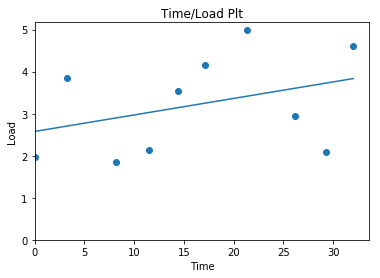

In [17]:
## calculate the line
x_lr = [0, data[-1, 0]]
y_lr = [ clfr.coef_ * x + clfr.intercept_ for x in x_lr ]

## plot
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.scatter(data[:, 0], data[:, 1])
ax1.plot(x_lr, y_lr)
plt.xlim(0)
plt.ylim(0)
plt.xlabel('Time')
plt.ylabel('Load')
plt.title('Time/Load Plt')
plt.show()
